# Telco Curn challenge

# 1) Analisi dei dati

In [1]:
import pandas as pd

telco = pd.read_csv('telco_churn_train.csv')

telco['Churn'] = telco['Churn'].replace('No', 0)
telco['Churn'] = telco['Churn'].replace('Yes', 1)
telco = telco.drop(labels=['customerID'], axis=1)

to_delete = telco.loc[telco.TotalCharges == ' ']

for i in to_delete.index:
    telco.drop(i, inplace=True)

In [2]:
object_cols = []
for name in telco.columns:
    if telco[name].dtypes=='object':
        object_cols.append(name)

In [3]:
unique_cat_values = []
for name in object_cols:
    unique_cat_values.append('Unique values in column ' + name + ': ' + str(telco[name].unique()))
    
unique_cat_values

["Unique values in column gender: ['Female' 'Male']",
 "Unique values in column Partner: ['No' 'Yes']",
 "Unique values in column Dependents: ['Yes' 'No']",
 "Unique values in column PhoneService: ['Yes' 'No']",
 "Unique values in column MultipleLines: ['No' 'Yes' 'No phone service']",
 "Unique values in column InternetService: ['DSL' 'Fiber optic' 'No']",
 "Unique values in column OnlineSecurity: ['Yes' 'No' 'No internet service']",
 "Unique values in column OnlineBackup: ['No' 'Yes' 'No internet service']",
 "Unique values in column DeviceProtection: ['Yes' 'No' 'No internet service']",
 "Unique values in column TechSupport: ['No' 'No internet service' 'Yes']",
 "Unique values in column StreamingTV: ['No' 'Yes' 'No internet service']",
 "Unique values in column StreamingMovies: ['Yes' 'No' 'No internet service']",
 "Unique values in column Contract: ['One year' 'Two year' 'Month-to-month']",
 "Unique values in column PaperlessBilling: ['No' 'Yes']",
 "Unique values in column PaymentM

In [4]:
telco['Churn'].value_counts()

0    4128
1    1496
Name: Churn, dtype: int64

In [5]:
telco['tenure'].unique()

array([21, 54,  1,  4,  7, 32, 72, 19, 10, 45, 40, 47, 36, 69, 71, 35,  3,
       68, 42,  8, 46, 12, 26, 49, 33, 31, 66, 58, 13, 57,  6, 59, 15, 27,
       34, 18,  5, 39, 29,  2, 63, 20, 14, 56, 37, 24, 52, 43, 11, 16, 50,
       38, 23, 55, 48, 53, 70, 22, 28, 44, 65, 64, 60, 51,  9, 25, 61, 30,
       17, 41, 67, 62], dtype=int64)

## 2) Analisi di alcune variabili catgoriche

In [6]:
import seaborn as sns

,Churn
InternetService,
Fiber optic,2481
DSL,1935
No,1208


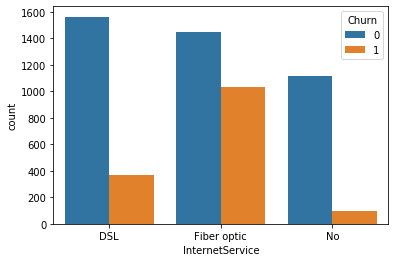

In [7]:
ax = sns.countplot(x="InternetService", hue="Churn", data=telco)
telco[['InternetService', 'Churn']].groupby(['InternetService']).count().sort_values(by='Churn', ascending=False)

,Churn
OnlineSecurity,
No,2810
Yes,1606
No internet service,1208


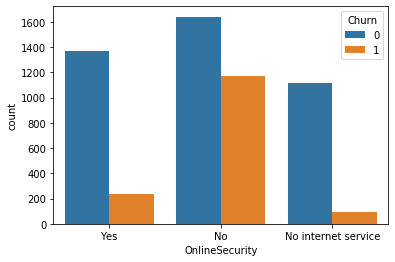

In [8]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=telco)
telco[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity']).count().sort_values(by='Churn', ascending=False)

,Churn
PaymentMethod,
Electronic check,1887
Mailed check,1275
Bank transfer (automatic),1236
Credit card (automatic),1226


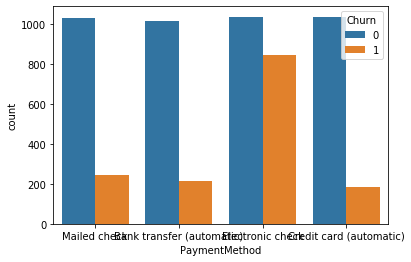

In [9]:
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=telco)
telco[['PaymentMethod', 'Churn']].groupby(['PaymentMethod']).count().sort_values(by='Churn', ascending=False)

,Churn
Contract,
Month-to-month,3083
Two year,1330
One year,1211


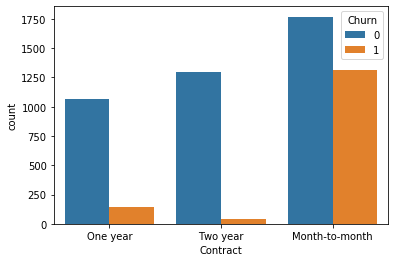

In [10]:
ax = sns.countplot(x="Contract", hue="Churn", data=telco)
telco[['Contract', 'Churn']].groupby(['Contract']).count().sort_values(by='Churn', ascending=False)

,Churn
gender,
Male,2881
Female,2743


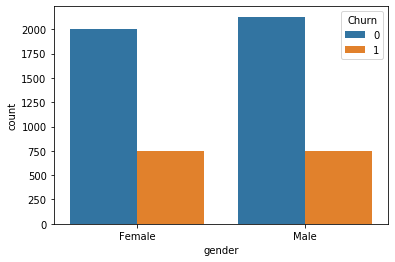

In [11]:
ax = sns.countplot(x="gender", hue="Churn", data=telco)
telco[['gender', 'Churn']].groupby(['gender']).count().sort_values(by='Churn', ascending=False)

,Churn
SeniorCitizen,
0,4718
1,906


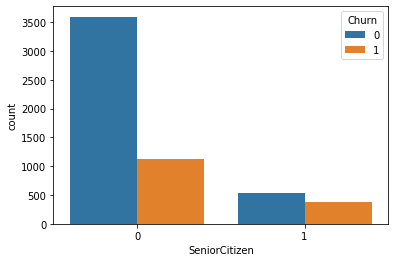

In [12]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=telco)
telco[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']).count().sort_values(by='Churn', ascending=False)

## 3) Preprocessing dei dati

In [13]:
from sklearn.model_selection import train_test_split

y = telco['Churn']
telco_data = telco.drop(labels=['Churn'], axis=1)

train_data, test_data, y_train, y_test = train_test_split(telco_data, y, train_size=0.7, test_size=0.3)

In [14]:
# Cambio di tipi
train_data = train_data.astype({"TotalCharges": float})
test_data = test_data.astype({"TotalCharges": float})

In [15]:
train_data['Contract'] = train_data['Contract'].replace('Two year', 'Other')
train_data['Contract'] = train_data['Contract'].replace('Two year', 'Other')

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_cols = []
for name in train_data.columns:
    if train_data[name].dtypes=='object':
        encoded_cols.append(name)

for col in encoded_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])     

train_data = train_data.drop(labels=['gender', 'Partner', 'SeniorCitizen'], axis=1)
train_data.head()

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3186,0,6,1,0,1,0,0,2,2,2,2,0,1,3,99.95,547.65
4504,1,60,1,0,2,1,1,1,1,1,1,2,1,0,20.95,1270.55
4169,0,6,1,0,0,0,2,0,0,2,0,0,0,2,59.45,357.60
4630,0,26,1,2,1,0,0,2,0,0,0,0,1,2,80.70,2193.00
652,0,66,1,2,1,0,2,2,2,2,2,1,1,0,107.35,7051.95


In [17]:
encoded_cols = []
for name in test_data.columns:
    if test_data[name].dtypes=='object':
        encoded_cols.append(name)

for col in encoded_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col]) 

test_data = test_data.drop(labels=['gender', 'Partner', 'SeniorCitizen'], axis=1)
test_data.head()

,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4577,0,70,1,0,0,2,0,2,2,2,2,2,0,0,79.60,5589.45
3444,1,1,1,2,2,1,1,1,1,1,1,0,0,3,24.00,24.00
5159,0,35,1,2,1,0,0,0,0,0,0,0,1,2,75.20,2576.20
3726,0,15,1,2,0,0,0,0,0,0,0,0,0,2,51.55,765.50
4431,0,1,1,0,2,1,1,1,1,1,1,0,0,1,19.80,19.80


## 3) Creazione modello e valutazione sul validation set

In [18]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.012)
logistic.fit(train_data, y_train)

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.012, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print("Training set score: {:.2f}".format(logistic.score(train_data, y_train)))
print("Test set score: {:.2f}".format(logistic.score(test_data, y_test)))

Training set score: 0.80
Test set score: 0.79


In [20]:
from sklearn.tree import DecisionTreeClassifier

for i in range(2,12):
    tree = DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(train_data, y_train)

    print('DecisionTree with max-depth: ' + str(i))
    print("Accuracy on training set: {:.2f}".format(tree.score(train_data, y_train)))
    print("Accuracy on test set: {:.2f}".format(tree.score(test_data, y_test)))
    print('\n')

DecisionTree with max-depth: 2
Accuracy on training set: 0.74
Accuracy on test set: 0.74


DecisionTree with max-depth: 3
Accuracy on training set: 0.78
Accuracy on test set: 0.77


DecisionTree with max-depth: 4
Accuracy on training set: 0.79
Accuracy on test set: 0.76


DecisionTree with max-depth: 5
Accuracy on training set: 0.80
Accuracy on test set: 0.79


DecisionTree with max-depth: 6
Accuracy on training set: 0.81
Accuracy on test set: 0.78


DecisionTree with max-depth: 7
Accuracy on training set: 0.82
Accuracy on test set: 0.78


DecisionTree with max-depth: 8
Accuracy on training set: 0.83
Accuracy on test set: 0.77


DecisionTree with max-depth: 9
Accuracy on training set: 0.85
Accuracy on test set: 0.78


DecisionTree with max-depth: 10
Accuracy on training set: 0.87
Accuracy on test set: 0.76


DecisionTree with max-depth: 11
Accuracy on training set: 0.89
Accuracy on test set: 0.76




## 4) Prova con una Rete Neurale

In [21]:
import tensorflow as tf
import numpy as np

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

telco_nn = pd.read_csv('telco_churn_train.csv')

telco_nn['Churn'] = telco_nn['Churn'].replace('No', 0)
telco_nn['Churn'] = telco_nn['Churn'].replace('Yes', 1)
telco_nn = telco_nn.drop(labels=['customerID'], axis=1)

to_delete = telco_nn.loc[telco_nn.TotalCharges == ' ']

for i in to_delete.index:
    telco_nn.drop(i, inplace=True)


In [23]:
object_cols = []
for name in telco_nn.columns:
    if telco_nn[name].dtypes=='object':
        object_cols.append(name)

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_cols = []
for name in telco_nn.columns:
    if telco_nn[name].dtypes=='object':
        encoded_cols.append(name)

for col in encoded_cols:
    telco_nn[col] = label_encoder.fit_transform(telco[col])     

telco_nn.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,491
1,0,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,3510
2,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1565
3,1,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,1626
5,0,1,0,0,0,7,1,0,1,0,0,0,0,0,0,0,1,2,69.55,3548


In [25]:
from sklearn.model_selection import train_test_split

y_nn = telco_nn['Churn']
telco_data_nn = telco_nn.drop(labels=['Churn'], axis=1)

train_data_nn, test_data_nn, y_train_nn, y_test_nn = train_test_split(telco_data_nn, y_nn, train_size=0.75, test_size=0.25)

total_train_data_nn = pd.concat([train_data_nn, y_train_nn], axis=1)
total_test_data_nn = pd.concat([test_data_nn, y_test_nn], axis=1)

In [26]:
cols_nn = ['SeniorCitizen','InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
           'PhoneService', 'MultipleLines', 'StreamingTV', 'tenure']

In [27]:
training_dataset_nn = (
    tf.data.Dataset.from_tensor_slices((tf.cast(total_train_data_nn[cols_nn].values, tf.float32),
                                        tf.cast(total_train_data_nn['Churn'].values, tf.int32))))

In [28]:
validation_dataset_nn = (
    tf.data.Dataset.from_tensor_slices((tf.cast(total_test_data_nn[cols_nn].values, tf.float32),
                                        tf.cast(total_test_data_nn['Churn'].values, tf.int32))))

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [30]:
lr = 0.1
errors = []

optimizer = tf.optimizers.SGD(lr)
loss = tf.losses.MeanSquaredError()

In [31]:
#model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [32]:
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

Train for 4218 steps
Epoch 1/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2075 - accuracy: 0.7310
Epoch 2/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2067 - accuracy: 0.7300
Epoch 3/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2054 - accuracy: 0.7288
Epoch 4/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2013 - accuracy: 0.7328
Epoch 5/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2020 - accuracy: 0.7319
Epoch 6/20
4218/4218 [==============================] - 6s 1ms/step - loss: 0.2019 - accuracy: 0.7317
Epoch 7/20
4218/4218 [==============================] - 5s 1ms/step - loss: 0.2013 - accuracy: 0.7318
Epoch 8/20
4218/4218 [==============================] - 5s 1ms/step - loss: 0.2017 - accuracy: 0.7309
Epoch 9/20
4218/4218 [==============================] - 9s 2ms/step - loss: 0.2017 - accuracy: 0.7313
Epoch 10/20
4218/4218 [==============================] - 9s 2

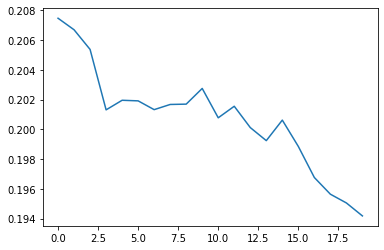

In [33]:
import matplotlib.pyplot as plt

history = model.fit(training_dataset_nn, epochs=20)
plt.plot(history.history['loss'])

In [34]:
results = model.evaluate(validation_dataset_nn)
print('test acc:', results[1])

1406/1406 [==============================] - 1s 971us/step - loss: 0.1951 - accuracy: 0.7319
test acc: 0.73186344
